In [1]:
import pandas as pd 
import os
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from subprocess import check_output
import numpy as np
import matplotlib.pyplot as plt
import warnings
import math
from pandas.plotting import lag_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.graphics.tsaplots import plot_predict
from statsmodels.tsa.arima.model import ARIMAResults
from pandas import datetime
from sklearn.metrics import mean_squared_error
df = pd.read_csv("../Resources/btcjoin.csv", index_col='date', parse_dates=['date'])
df = df.drop(columns=['volume','change', 'low', 'high', 'open','value','address','mined'])
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype("float")
print(df.tail())
df.to_csv('../Resources/colabbtc.csv')
#https://towardsdatascience.com/bitcoin-price-prediction-using-time-series-forecasting-9f468f7174d3

C:\Users\16474\AppData\Local\Temp\ipykernel_11236\87143007.py:14: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


              price
date               
2022-10-21  19162.6
2022-10-22  19204.8
2022-10-23  19571.2
2022-10-24  19331.5
2022-10-25  20073.1


In [2]:
import pandas as kunfu
import numpy as dragon
import pylab as p
import matplotlib.pyplot as plot
from collections import Counter
import re

#importing packages for the prediction of time-series data
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

from sklearn.metrics import mean_squared_error

<class 'pandas.core.frame.DataFrame'>
            price
date             
2010-09-25    0.1
2010-09-26    0.1
2010-09-27    0.1
2010-09-28    0.1
2010-09-29    0.1


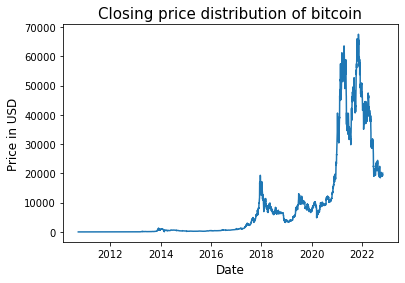

In [3]:
print (type(df))
print (df.head())
plot.plot(df)
plot.xlabel('Date', fontsize=12)
plot.ylabel('Price in USD', fontsize=12)
plot.title("Closing price distribution of bitcoin", fontsize=15)
plot.show()

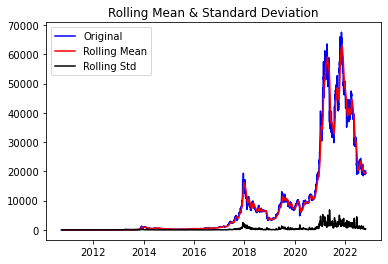

ADF Stastistic: -1.769203
p-value: 0.395855
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [4]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(x):


    #Determing rolling statistics
    rolmean = x.rolling(window=22,center=False).mean()

    rolstd = x.rolling(window=12,center=False).std()
    
    #Plot rolling statistics:
    orig = plot.plot(x, color='blue',label='Original')
    mean = plot.plot(rolmean, color='red', label='Rolling Mean')
    std = plot.plot(rolstd, color='black', label = 'Rolling Std')
    plot.legend(loc='best')
    plot.title('Rolling Mean & Standard Deviation')
    plot.show(block=False)
    
    #Perform Dickey Fuller test    
    result=adfuller(x)
    print('ADF Stastistic: %f'%result[0])
    print('p-value: %f'%result[1])
    pvalue=result[1]
    for key,value in result[4].items():
         if result[0]>value:
            print("The graph is non stationery")
            break
         else:
            print("The graph is stationery")
            break;
    print('Critical values:')
    for key,value in result[4].items():
        print('\t%s: %.3f ' % (key, value))
        
ts = df['price']      
test_stationarity(ts)

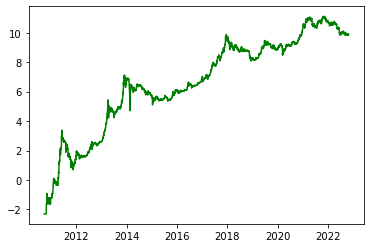

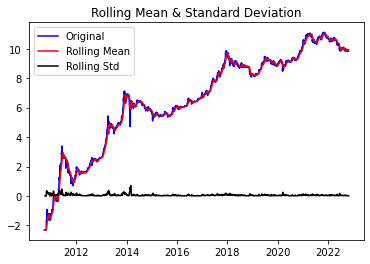

ADF Stastistic: -3.182831
p-value: 0.021000
The graph is non stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [5]:
ts_log = dragon.log(ts)
plot.plot(ts_log,color="green")
plot.show()

test_stationarity(ts_log)

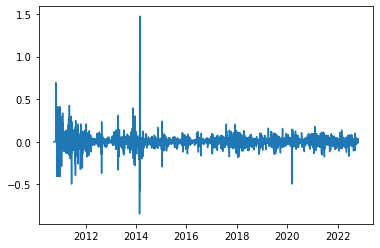

In [6]:
ts_log_diff = ts_log - ts_log.shift()
plot.plot(ts_log_diff)
plot.show()

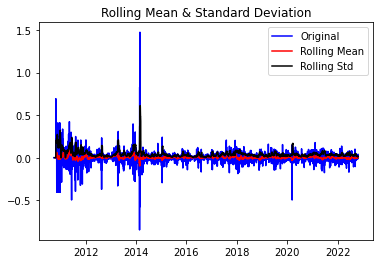

ADF Stastistic: -25.023770
p-value: 0.000000
The graph is stationery
Critical values:
	1%: -3.432 
	5%: -2.862 
	10%: -2.567 


In [7]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


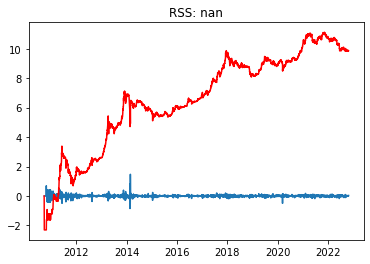

In [8]:
# follow lag
model = ARIMA(ts_log, order=(1,1,0))  
results_ARIMA = model.fit()  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


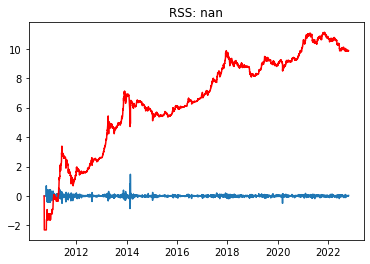

In [9]:
# follow error
model = ARIMA(ts_log, order=(0,1,1))  
results_MA = model.fit()  
plot.plot(ts_log_diff)
plot.plot(results_MA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_MA.fittedvalues-ts_log_diff)**2))
plot.show()

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\16474\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


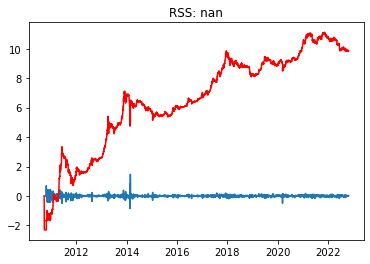

In [10]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(ts_log, order=(2,1,0))  
results_ARIMA = model.fit()  
plot.plot(ts_log_diff)
plot.plot(results_ARIMA.fittedvalues, color='red')
plot.title('RSS: %.7f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))
plot.show()

Printing Predicted vs Expected Values...


predicted = 46953.365854,   expected = 47123.300000,   error = 0.360616  %
predicted = 47292.768633,   expected = 46219.500000,   error = 2.322112  %
predicted = 46122.558334,   expected = 47738.000000,   error = 3.383974  %
predicted = 47872.758178,   expected = 47311.800000,   error = 1.185662  %
predicted = 47069.521685,   expected = 46430.200000,   error = 1.376952  %
predicted = 46505.852099,   expected = 45837.300000,   error = 1.458533  %
predicted = 45982.383878,   expected = 43425.900000,   error = 5.887003  %
predicted = 43538.433208,   expected = 43097.500000,   error = 1.023106  %
predicted = 43478.237553,   expected = 41546.700000,   error = 4.649076  %
predicted = 41612.003292,   expected = 41672.000000,   error = 0.143974  %
predicted = 41917.846387,   expected = 41848.300000,   error = 0.166187  %
predicted = 41826.311078,   expected = 41832.200000,   error = 0.014077  %
predicted = 41803.878249,   expected = 42733.200000,   er

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 43284.434434,   expected = 43097.000000,   error = 0.434913  %
predicted = 43013.527552,   expected = 43079.100000,   error = 0.152214  %
predicted = 43075.448214,   expected = 42209.300000,   error = 2.052032  %
predicted = 42220.300252,   expected = 42364.600000,   error = 0.340614  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 42502.714192,   expected = 41677.800000,   error = 1.979265  %
predicted = 41659.591375,   expected = 40715.900000,   error = 2.317747  %
predicted = 40832.393693,   expected = 36475.500000,   error = 11.944713  %
predicted = 36650.605908,   expected = 35075.200000,   error = 4.491509  %
predicted = 35714.846965,   expected = 36269.500000,   error = 1.529255  %
predicted = 36487.976830,   expected = 36686.300000,   error = 0.540592  %
predicted = 36485.026364,   expected = 36950.600000,   error = 1.259989  %
predicted = 36880.207228,   expected = 36800.400000,   error = 0.216865  %
predicted = 36759.203720,   expected = 37164.300000,   error = 1.090015  %
predicted = 37185.383957,   expected = 37745.100000,   error = 1.482884  %
predicted = 37679.981265,   expected = 38170.800000,   error = 1.285849  %
predicted = 38071.647440,   expected = 37917.700000,   error = 0.406004  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 37851.502465,   expected = 38498.600000,   error = 1.680834  %
predicted = 38534.586830,   expected = 38709.700000,   error = 0.452375  %
predicted = 38613.047146,   expected = 36890.200000,   error = 4.670203  %
predicted = 36873.810859,   expected = 37287.800000,   error = 1.110254  %
predicted = 37574.651450,   expected = 41567.600000,   error = 9.605916  %
predicted = 41454.911890,   expected = 41412.100000,   error = 0.103380  %
predicted = 40693.239053,   expected = 42392.200000,   error = 4.007721  %
predicted = 42408.830563,   expected = 43833.900000,   error = 3.251067  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 43655.716808,   expected = 44038.200000,   error = 0.868526  %
predicted = 43799.557657,   expected = 44388.900000,   error = 1.327680  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 44352.472669,   expected = 43521.000000,   error = 1.910509  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 43473.120779,   expected = 42388.400000,   error = 2.559004  %
predicted = 42533.625655,   expected = 42205.200000,   error = 0.778164  %
predicted = 42386.636366,   expected = 42061.100000,   error = 0.773961  %
predicted = 42091.768040,   expected = 42550.300000,   error = 1.077623  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 42569.348366,   expected = 44544.400000,   error = 4.433894  %
predicted = 44443.233922,   expected = 43883.600000,   error = 1.275269  %
predicted = 43566.619505,   expected = 40552.800000,   error = 7.431841  %
predicted = 40679.363174,   expected = 40000.100000,   error = 1.698154  %
predicted = 40517.830117,   expected = 40090.300000,   error = 1.066418  %
predicted = 40178.358090,   expected = 38355.000000,   error = 4.753899  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 38356.069103,   expected = 37017.700000,   error = 3.615484  %
predicted = 37294.447372,   expected = 38248.200000,   error = 2.493588  %
predicted = 38456.790825,   expected = 37224.600000,   error = 3.310152  %
predicted = 37037.673161,   expected = 38339.200000,   error = 3.394768  %
predicted = 38497.134424,   expected = 39209.600000,   error = 1.817069  %
predicted = 39015.706382,   expected = 39115.500000,   error = 0.255126  %
predicted = 38974.983112,   expected = 37689.100000,   error = 3.411817  %
predicted = 37716.145234,   expected = 43188.200000,   error = 12.670254  %
predicted = 43393.656906,   expected = 44420.300000,   error = 2.311203  %
predicted = 43443.692884,   expected = 43912.800000,   error = 1.068270  %
predicted = 43718.520966,   expected = 42463.000000,   error = 2.956741  %
predicted = 42554.570164,   expected = 39142.700000,   error = 8.716492  %
predicted = 39383.390621,   expected = 39395.800000,   error = 0.031499  %
predicted = 39914.275798

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 40617.279952,   expected = 41767.800000,   error = 2.754562  %
predicted = 41793.380528,   expected = 42233.000000,   error = 1.040938  %
predicted = 42088.722314,   expected = 41276.000000,   error = 1.968995  %
predicted = 41211.066528,   expected = 41022.000000,   error = 0.460891  %
predicted = 41175.964754,   expected = 42373.000000,   error = 2.824995  %
predicted = 42402.617937,   expected = 42912.000000,   error = 1.187039  %
predicted = 42683.769521,   expected = 44013.000000,   error = 3.020086  %
predicted = 43913.445813,   expected = 44331.000000,   error = 0.941901  %
predicted = 44147.711846,   expected = 44548.000000,   error = 0.898555  %
predicted = 44494.443200,   expected = 46859.000000,   error = 5.046110  %
predicted = 46800.794245,   expected = 47105.000000,   error = 0.645804  %
predicted = 46720.944700,   expected = 47449.000000,   error = 1.534395  %
predicted = 47405.934739,   expected = 47075.000000,   error = 0.702995  %
predicted = 47023.276603,

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 45596.746127,   expected = 46297.000000,   error = 1.512525  %
predicted = 46540.026372,   expected = 45811.000000,   error = 1.591378  %
predicted = 45691.594468,   expected = 46407.000000,   error = 1.541590  %
predicted = 46480.408900,   expected = 46629.000000,   error = 0.318667  %
predicted = 46530.128808,   expected = 45506.000000,   error = 2.250536  %
predicted = 45481.115874,   expected = 43173.000000,   error = 5.346202  %
predicted = 43363.186550,   expected = 43448.000000,   error = 0.195207  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 43814.983434,   expected = 42275.000000,   error = 3.642776  %
predicted = 42242.269924,   expected = 42767.000000,   error = 1.226951  %
predicted = 42951.137650,   expected = 42138.000000,   error = 1.929702  %
predicted = 42065.319357,   expected = 39497.000000,   error = 6.502568  %
predicted = 39614.250597,   expected = 40078.000000,   error = 1.157117  %
predicted = 40492.005754,   expected = 41133.000000,   error = 1.558345  %
predicted = 41026.873775,   expected = 39936.000000,   error = 2.731555  %
predicted = 39780.029553,   expected = 40560.000000,   error = 1.923004  %
predicted = 40747.410460,   expected = 40382.000000,   error = 0.904885  %
predicted = 40283.028893,   expected = 39703.000000,   error = 1.460920  %
predicted = 39737.224422,   expected = 40803.000000,   error = 2.612003  %
predicted = 40904.270904,   expected = 41503.000000,   error = 1.442616  %
predicted = 41314.531319,   expected = 41368.000000,   error = 0.129251  %
predicted = 41256.168271,

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 39543.087125,   expected = 39464.000000,   error = 0.200403  %
predicted = 39510.309255,   expected = 40427.000000,   error = 2.267521  %
predicted = 40410.597211,   expected = 38113.000000,   error = 6.028382  %
predicted = 37985.876702,   expected = 39243.000000,   error = 3.203433  %
predicted = 39606.146079,   expected = 39748.000000,   error = 0.356883  %
predicted = 39556.953505,   expected = 38581.000000,   error = 2.529622  %
predicted = 38512.314468,   expected = 37650.000000,   error = 2.290344  %
predicted = 37839.487976,   expected = 38461.000000,   error = 1.615954  %
predicted = 38604.909496,   expected = 38514.000000,   error = 0.236043  %
predicted = 38381.635812,   expected = 37718.000000,   error = 1.759467  %
predicted = 37716.913708,   expected = 39688.000000,   error = 4.966454  %
predicted = 39802.801532,   expected = 36544.000000,   error = 8.917474  %
predicted = 36274.460331,   expected = 36009.000000,   error = 0.737206  %
predicted = 36495.430660,

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 28947.176212,   expected = 28976.000000,   error = 0.099475  %
predicted = 29278.018990,   expected = 29284.400000,   error = 0.021790  %
predicted = 29296.367872,   expected = 30080.400000,   error = 2.606455  %
predicted = 30021.866916,   expected = 31308.700000,   error = 4.110145  %
predicted = 31162.900623,   expected = 29849.000000,   error = 4.401825  %
predicted = 29671.716310,   expected = 30437.500000,   error = 2.515922  %
predicted = 30665.313149,   expected = 28683.700000,   error = 6.908499  %
predicted = 28610.585448,   expected = 30305.900000,   error = 5.594008  %
predicted = 30578.281449,   expected = 29178.600000,   error = 4.796945  %
predicted = 28934.273596,   expected = 29434.600000,   error = 1.699790  %
predicted = 29610.682313,   expected = 30286.600000,   error = 2.231738  %
predicted = 30235.795424,   expected = 29093.300000,   error = 3.927005  %
predicted = 28972.680329,   expected = 29648.700000,   error = 2.280099  %
predicted = 29833.926471,

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 30247.743636,   expected = 30097.800000,   error = 0.498188  %
predicted = 30244.570406,   expected = 29083.300000,   error = 3.992911  %
predicted = 29109.374967,   expected = 28403.400000,   error = 2.485530  %
predicted = 28566.107433,   expected = 26606.300000,   error = 7.365953  %
predicted = 26724.287814,   expected = 22448.000000,   error = 19.049750  %
predicted = 22718.949941,   expected = 22157.300000,   error = 2.534830  %
predicted = 22767.637406,   expected = 22577.900000,   error = 0.840368  %
predicted = 22620.905372,   expected = 20386.600000,   error = 10.959676  %
predicted = 20344.827120,   expected = 20444.600000,   error = 0.488016  %
predicted = 20778.718111,   expected = 18986.500000,   error = 9.439434  %
predicted = 18990.930488,   expected = 20577.200000,   error = 7.708870  %
predicted = 20803.957725,   expected = 20572.300000,   error = 1.126066  %
predicted = 20311.706581,   expected = 20720.400000,   error = 1.972421  %
predicted = 20719.75263

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 20858.003997,   expected = 19963.200000,   error = 4.482267  %
predicted = 20081.932821,   expected = 19330.900000,   error = 3.885142  %
predicted = 19469.702620,   expected = 20250.000000,   error = 3.853320  %
predicted = 20344.381859,   expected = 20586.000000,   error = 1.173701  %
predicted = 20432.096051,   expected = 20825.100000,   error = 1.887165  %
predicted = 20768.703976,   expected = 21209.900000,   error = 2.080142  %
predicted = 21167.546717,   expected = 20785.600000,   error = 1.837554  %
predicted = 20729.462754,   expected = 22525.800000,   error = 7.974577  %
predicted = 22580.526458,   expected = 23410.200000,   error = 3.544069  %
predicted = 23106.150238,   expected = 23215.200000,   error = 0.469734  %
predicted = 23076.110847,   expected = 23153.000000,   error = 0.332092  %
predicted = 23184.216955,   expected = 22675.200000,   error = 2.244818  %
predicted = 22689.253250,   expected = 22460.400000,   error = 1.018919  %
predicted = 22536.559884,

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 22837.728972,   expected = 23175.300000,   error = 1.456598  %
predicted = 23230.917974,   expected = 23816.300000,   error = 2.457905  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 23772.585665,   expected = 23146.700000,   error = 2.703995  %
predicted = 23053.097145,   expected = 23962.900000,   error = 3.796714  %
predicted = 24063.439925,   expected = 23935.300000,   error = 0.535360  %
predicted = 23804.741097,   expected = 24398.700000,   error = 2.434388  %
predicted = 24398.775871,   expected = 24442.500000,   error = 0.178886  %
predicted = 24368.105140,   expected = 24302.800000,   error = 0.268714  %
predicted = 24297.210083,   expected = 24101.700000,   error = 0.811188  %
predicted = 24125.422181,   expected = 23856.800000,   error = 1.125977  %
predicted = 23890.436413,   expected = 23338.000000,   error = 2.367111  %
predicted = 23380.499373,   expected = 23203.600000,   error = 0.762379  %
predicted = 23285.638886,   expected = 20831.300000,   error = 11.781977  %
predicted = 20871.171007,   expected = 21138.900000,   error = 1.266523  %
predicted = 21499.143325,   expected = 21517.200000,   error = 0.083917  %
predicted = 21463.878949

c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 21587.676672,   expected = 20249.900000,   error = 6.606337  %
predicted = 20232.047638,   expected = 20033.900000,   error = 0.989062  %
predicted = 20236.058604,   expected = 19550.200000,   error = 3.508192  %
predicted = 19587.781116,   expected = 20295.800000,   error = 3.488500  %
predicted = 20367.087536,   expected = 19792.600000,   error = 2.902537  %
predicted = 19680.715140,   expected = 20043.900000,   error = 1.811947  %
predicted = 20121.039529,   expected = 20126.100000,   error = 0.025144  %
predicted = 20085.304018,   expected = 19952.700000,   error = 0.664592  %
predicted = 19941.454968,   expected = 19831.400000,   error = 0.554953  %
predicted = 19859.636232,   expected = 19999.900000,   error = 0.701322  %
predicted = 20017.546695,   expected = 19793.100000,   error = 1.133964  %
predicted = 19768.644292,   expected = 18786.400000,   error = 5.228486  %
predicted = 18826.510817,   expected = 19281.500000,   error = 2.359719  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 19436.169857,   expected = 19317.400000,   error = 0.614834  %
predicted = 19237.937341,   expected = 21365.200000,   error = 9.956671  %
predicted = 21338.487911,   expected = 21650.400000,   error = 1.440676  %
predicted = 21306.596435,   expected = 21834.900000,   error = 2.419537  %
predicted = 21787.607179,   expected = 22395.300000,   error = 2.713484  %
predicted = 22360.069709,   expected = 20175.500000,   error = 10.827834  %
predicted = 20115.137926,   expected = 20222.500000,   error = 0.530904  %
predicted = 20557.284983,   expected = 19701.700000,   error = 4.342696  %
predicted = 19699.410062,   expected = 19802.400000,   error = 0.520088  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 19882.853064,   expected = 20113.500000,   error = 1.146727  %
predicted = 20094.378036,   expected = 19418.800000,   error = 3.478990  %
predicted = 19377.784260,   expected = 19538.900000,   error = 0.824590  %
predicted = 19646.059525,   expected = 18872.400000,   error = 4.099423  %
predicted = 18860.419734,   expected = 18489.000000,   error = 2.008869  %
predicted = 18593.825563,   expected = 19404.000000,   error = 4.175296  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 19457.682321,   expected = 19293.500000,   error = 0.850972  %
predicted = 19148.524583,   expected = 18925.200000,   error = 1.180038  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 18945.739574,   expected = 18803.200000,   error = 0.758060  %
predicted = 18861.479343,   expected = 19225.700000,   error = 1.894447  %
predicted = 19241.142256,   expected = 19081.000000,   error = 0.839276  %


c:\Users\16474\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted = 19015.794691,   expected = 19411.000000,   error = 2.035986  %
predicted = 19430.857968,   expected = 19593.000000,   error = 0.827551  %
predicted = 19538.455334,   expected = 19423.000000,   error = 0.594426  %
predicted = 19396.139200,   expected = 19311.900000,   error = 0.436204  %
predicted = 19339.467927,   expected = 19052.200000,   error = 1.507794  %
predicted = 19071.897765,   expected = 19628.300000,   error = 2.834694  %
predicted = 19664.476484,   expected = 20340.200000,   error = 3.322109  %
predicted = 20238.130305,   expected = 20157.500000,   error = 0.400002  %
predicted = 20046.553676,   expected = 19956.700000,   error = 0.450243  %
predicted = 19986.985537,   expected = 19531.300000,   error = 2.333104  %
predicted = 19566.151913,   expected = 19415.000000,   error = 0.778532  %
predicted = 19482.055346,   expected = 19441.000000,   error = 0.211179  %
predicted = 19459.027632,   expected = 19134.600000,   error = 1.695503  %
predicted = 19133.494969,

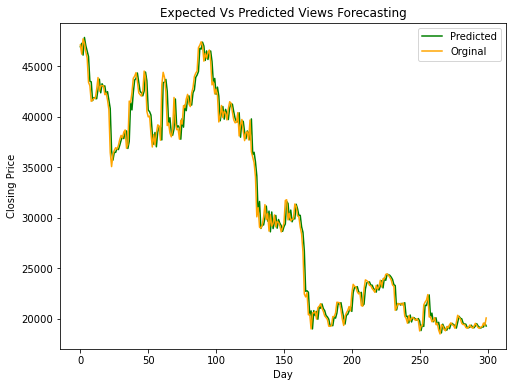

In [11]:
size = int(len(ts_log)-300)
# Divide into train and test
train_arima, test_arima = ts_log[0:size], ts_log[size:len(ts_log)]
history = [x for x in train_arima]
predictions = list()
originals = list()
error_list = list()

print('Printing Predicted vs Expected Values...')
print('\n')
# We go over each value in the test set and then apply ARIMA model and calculate the predicted value. We have the expected value in the test set therefore we calculate the error between predicted and expected value 
for t in range(len(test_arima)):
    model = ARIMA(history, order=(2, 1, 0))
    model_fit = model.fit()
    
    output = model_fit.forecast()
    
    pred_value = output[0]
    
        
    original_value = test_arima[t]
    history.append(original_value)
    
    pred_value = dragon.exp(pred_value)
    
    
    original_value = dragon.exp(original_value)
    
    # Calculating the error
    error = ((abs(pred_value - original_value)) / original_value) * 100
    error_list.append(error)
    print('predicted = %f,   expected = %f,   error = %f ' % (pred_value, original_value, error), '%')
    
    predictions.append(float(pred_value))
    originals.append(float(original_value))
    
# After iterating over whole test set the overall mean error is calculated.   
print('\n Mean Error in Predicting Test Case Articles : %f ' % (sum(error_list)/float(len(error_list))), '%')
plot.figure(figsize=(8, 6))
test_day = [t
           for t in range(len(test_arima))]
labels={'Orginal','Predicted'}
plot.plot(test_day, predictions, color= 'green')
plot.plot(test_day, originals, color = 'orange')
plot.title('Expected Vs Predicted Views Forecasting')
plot.xlabel('Day')
plot.ylabel('Closing Price')
plot.legend(labels)
plot.show()
